## Business Understanding
In this notebook, we will use the [Data Scientist jobs dataset](https://www.kaggle.com/andrewmvd/data-scientist-jobs) to answer the following questions about where to look for a job as a data scientist:
1. Where are the data science jobs (by city and company)?
2. Which cities have the highest salary for data scientists?
3. Which sectors offer the most job opportunities for data scientists?
4. Is there a relationship between Glassdoor rating and salary?

## Data Understanding

We start by taking a closer look at the dataset. First, we read in the data and import the libraries we need.

In [2]:
import re
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std

%matplotlib inline

df = pd.read_csv('./DataScientist.csv')
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [3]:
print(f'There are {df.shape[0]} data points in this dataset.')

There are 3909 data points in this dataset.


In [4]:
df.describe(include="all")

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,3909.000000,3909.000000,3909,3909,3909,3909.000000,3909,3909,3909,3909,3909.000000,3909,3909,3909,3909,3909,3909
unique,NaN,NaN,2079,148,3685,NaN,2075,191,543,9,NaN,15,96,26,14,422,2
top,NaN,NaN,Data Scientist,$93K-$151K (Glassdoor est.),The U.S. Department of the Treasury has a dist...,NaN,Apple\n4.1,"Austin, TX","New York, NY",10000+ employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,NaN,NaN,274,62,14,NaN,60,345,297,993,NaN,1933,546,1124,1163,2760,3745
mean,1954.000000,2167.446662,NaN,NaN,NaN,3.283576,NaN,NaN,NaN,NaN,1479.154771,NaN,NaN,NaN,NaN,NaN,NaN
std,1128.575429,1247.657849,NaN,NaN,NaN,1.575749,NaN,NaN,NaN,NaN,855.750138,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,977.000000,1121.000000,NaN,NaN,NaN,3.200000,NaN,NaN,NaN,NaN,1625.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1954.000000,2161.000000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2931.000000,3249.000000,NaN,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


We want to get a sense of the range of job titles captured in this dataset. As we can see below, some of the jobs are for senior roles. We will want to  pay attention to this distinction when we are doing the salary analysis, 
since more senior roles tend to have higher salaries.

In [5]:
df["Job Title"].value_counts()

Data Scientist                                                         274
Data Engineer                                                          260
Data Analyst                                                           246
Senior Data Scientist                                                   91
Senior Data Analyst                                                     47
                                                                      ... 
Phoenix Data Science Tutor Jobs                                          1
Civil Engineer/GIS Data Analyst                                          1
Principal Device Modeling Engineer                                       1
SQL/SAS Data Analyst                                                     1
Patient Safety Physician or Safety Scientist - UK, Europe or the US      1
Name: Job Title, Length: 2079, dtype: int64

## Data Preparation


In this analysis, we are going to look at: "Company", "Rating", "Sector", "Location", "Salary", and "Revenue". We also include "Job Title" for reference, since companies may have multiple job listings for different job titles.

We start by taking the subset of columns we need, then clean up the data, as needed. 

In [6]:
df = df[["Job Title", "Salary Estimate", "Rating", "Company Name", "Location", "Sector"]]

In [7]:
df.head(10)

,Job Title,Salary Estimate,Rating,Company Name,Location,Sector
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",Travel & Tourism
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",Consumer Services
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",-1
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",Information Technology
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",Business Services
5,Data Scientist,$111K-$181K (Glassdoor est.),2.9,IFG Companies\n2.9,"New York, NY",Insurance
6,Quantitative Researcher,$111K-$181K (Glassdoor est.),4.4,PDT Partners\n4.4,"New York, NY",Finance
7,Quantitative Research Associate,$111K-$181K (Glassdoor est.),-1.0,Enlightenment Research,"New York, NY",-1
8,AI Scientist,$111K-$181K (Glassdoor est.),5.0,Paige\n5.0,"New York, NY",Information Technology
9,Quantitative Researcher,$111K-$181K (Glassdoor est.),4.8,Jane Street\n4.8,"New York, NY",Finance


### Cleanup - Company Name

In the dataframe above, we can see that the rating is sometimes appended to the Company Name column. Let's take
care of that in the next cell.

In [8]:
df['Company Name'] = df["Company Name"].str.partition("\n")[0]
df["Company Name"].head()

0                        Hopper
1                       Noom US
2                      Decode_M
3              Sapphire Digital
4    United Entertainment Group
Name: Company Name, dtype: object

### Cleanup - Salary Estimate

In [9]:
df["Salary Estimate"].value_counts()

$93K-$151K (Glassdoor est.)         62
$113K-$180K (Glassdoor est.)        61
$71K-$122K (Glassdoor est.)         60
$111K-$175K (Glassdoor est.)        60
$119K-$147K (Glassdoor est.)        44
                                    ..
$34-$53 Per Hour(Glassdoor est.)     7
$99K-$173K (Glassdoor est.)          6
$10-$26 Per Hour(Glassdoor est.)     3
$146K-$175K (Glassdoor est.)         3
$41K-$74K (Glassdoor est.)           1
Name: Salary Estimate, Length: 148, dtype: int64

As we can see above, we need to do a lot of clean-up to get the salary data in a workable format. We want this to be a quantitative variable so we can use it to compare salaries across companies and cities. We will also use the salary variable to look at the relationship between salary and company rating.

Some salaries are given as yearly salaries and some are given as hourly salaries. We could convert the hourly salaries to yearly salaries, but that might require further knowledge about whether those jobs are full-time or part-time, so we would need more information. For the purposes of this analysis, we will remove the hourly salaries and only consider jobs with yearly salaries provided.

Salaries are also given as a range, with lower and upper bounds. In this analysis, we will work with the average to facilitate using salary as a quantitative variable. 

In [10]:
def clean_salary(salary):
    """
    Given a salary range, takes the average of the upper and lower bounds

        Parameter:
                Salary: a string with the salary range in the format 111K−181K

        Returns:
                Average salary, or -1 if an hourly salary was given
    """
    
    # we don't need to process hourly salaries since we're going to remove these data points
    if "hour" in salary.lower():
        return -1
    
    # extract numbers from salary
    numbers = re.findall(r'\d+', salary)
    # convert to ints
    numbers = list(map(int, numbers))
    
    # TODO- we may not want to multiply this by 1000, and just write "in thousands" for the calculations
    # return the average salary
    return int(sum(numbers) / len(numbers) * 1000)
    
    
# apply function to salary column 
df["Salary Estimate"] = df["Salary Estimate"].apply(clean_salary)

# drop the hourly salaries
salary_df = df[df["Salary Estimate"] != -1]

### Cleanup - Rating

Here are the values for the company ratings:

In [11]:
df["Rating"].value_counts()

-1.0    409
 3.9    302
 3.7    290
 4.1    272
 3.6    252
 3.8    238
 4.0    200
 3.4    185
 3.5    176
 5.0    160
 4.2    154
 3.3    154
 3.2    136
 4.3    119
 3.1    113
 4.5    108
 4.4     76
 4.6     74
 3.0     65
 2.9     63
 4.7     59
 2.8     58
 4.9     45
 4.8     42
 2.5     33
 2.7     29
 2.6     27
 2.4     20
 2.3     10
 1.0     10
 2.2      9
 1.6      9
 2.0      4
 2.1      3
 1.9      3
 1.5      1
 1.7      1
Name: Rating, dtype: int64

According to [Glassdoor](https://help.glassdoor.com/s/article/Ratings-on-Glassdoor?language=en_US), company ratings are on a scale from 1-5, as follows:
- 0.00 - 1.50 Employees are "Very Dissatisfied"
- 1.51 - 2.50 Employees are "Dissatisfied"
- 2.51 - 3.50 Employees say it's "OK"
- 3.51 - 4.00 Employees are "Satisfied"
- 4.01 - 5.00 Employees are "Very Satisfied"


Unknown ratings are indicated with -1, so we want to remove these unknown values. We'll remove the missing rating values in a new dataframe to use for the rating analysis, since we want to retain as many data points as possible to answer the other questions.

In [12]:
rating_df = salary_df[salary_df.Rating != -1.0]
rating_df.shape

(3483, 6)

In [13]:
# display what the rating dataframe looks like
rating_df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Sector
0,Senior Data Scientist,146000,3.5,Hopper,"New York, NY",Travel & Tourism
1,"Data Scientist, Product Analytics",146000,4.5,Noom US,"New York, NY",Consumer Services
3,Data Analyst,146000,3.4,Sapphire Digital,"Lyndhurst, NJ",Information Technology
4,"Director, Data Science",146000,3.4,United Entertainment Group,"New York, NY",Business Services
5,Data Scientist,146000,2.9,IFG Companies,"New York, NY",Insurance


### Cleanup - Sectors

Here are the sectors in the dataset:

In [14]:
df["Sector"].value_counts()

Information Technology                1124
Business Services                      679
-1                                     546
Biotech & Pharmaceuticals              293
Finance                                270
Health Care                            197
Insurance                              109
Education                              101
Manufacturing                           87
Government                              82
Media                                   75
Retail                                  72
Accounting & Legal                      71
Aerospace & Defense                     37
Oil, Gas, Energy & Utilities            34
Telecommunications                      21
Consumer Services                       20
Non-Profit                              18
Construction, Repair & Maintenance      16
Transportation & Logistics              16
Real Estate                             12
Arts, Entertainment & Recreation        10
Restaurants, Bars & Food Services        9
Agriculture

In [23]:
# drop unknown sector values (indicated by -1)
sector_df = df[df.Sector != "-1"]

## Answering Questions with Data

### 1. Where are the data science jobs (by city and company)?

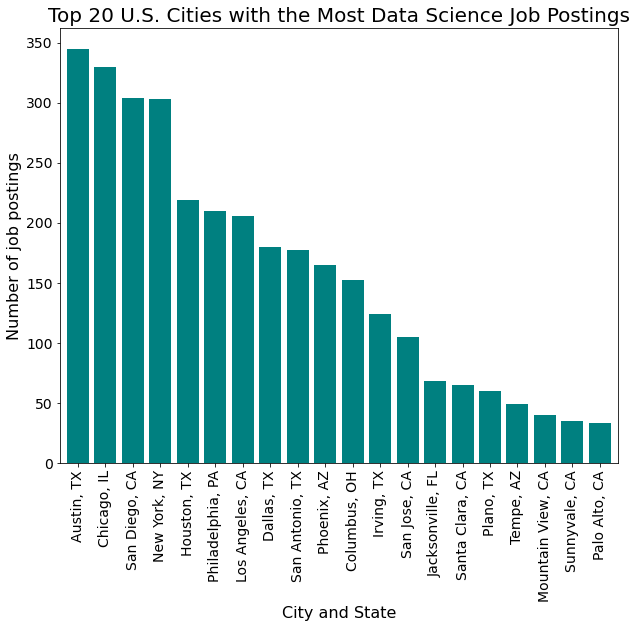

In [24]:
# Data Science Jobs by City
plt.figure(figsize = (10,8))
location_vals = df['Location'].value_counts().sort_values(ascending=False).head(20)

# Create a bar chart showing the top 20 locations with the most job postings
location_vals.plot.bar(color = "teal", width = 0.8, fontsize=14)

plt.title("Top 20 U.S. Cities with the Most Data Science Job Postings", fontsize=20) 
plt.xlabel("City and State", fontsize=16)
plt.ylabel("Number of job postings", fontsize=16)
plt.show()

The bar chart above visualizes the top 20 cities with the most data science job postings, which answers our question about which cities have the most data science jobs.

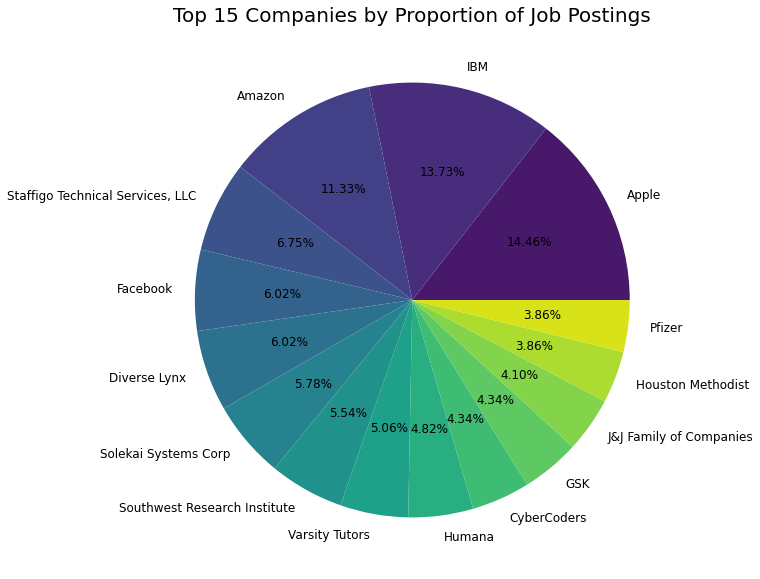

In [25]:
plt.figure(figsize = (40,10))
company_vals = df["Company Name"].value_counts().sort_values(ascending=False).head(15)
colors = sns.color_palette('viridis', 15)
company_vals.plot.pie(y="Company Name",autopct="%0.2f%%", colors=colors, fontsize=12)

plt.title("Top 15 Companies by Proportion of Job Postings", fontsize=20)
plt.axis("off")
plt.show()

In the cell above, we see the breakdown of data science jobs across companies. In particular, we look at the top 15 companies with the most data science job postings. Unsurprisingly, we see several tech giants in the top 5. The data for this dataset was scraped in 2020, so it is also not surprising that we would see some of the companies producing COVID-19 vaccines among the top hirers during this time.

### 2. Which sectors offer the most job opportunities for data scientists?

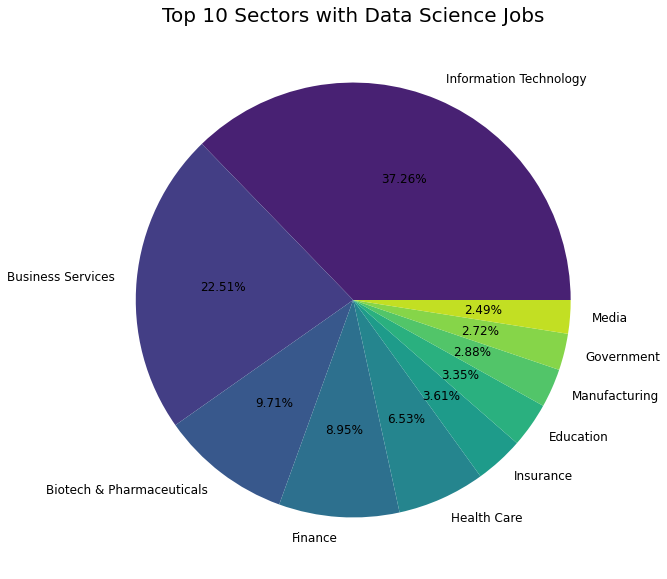

In [26]:
plt.figure(figsize = (50,10))
company_vals = sector_df["Sector"].value_counts().sort_values(ascending=False).head(10)
colors = sns.color_palette('viridis', 10)
company_vals.plot.pie(y="Setor",autopct="%0.2f%%", colors=colors, fontsize=12)

plt.title("Top 10 Sectors with Data Science Jobs", fontsize=20)
plt.axis("off")
plt.show()

In this pie chart, we see the breakdown of data science job postings by sector. IT is the top sector, followed by business services, biotech, finance, and healthcare. It would be an interesting comparison to look at job postings by sector in other years to see how hiring trends change over time.

In [27]:
# Get the top-rated company in each sector
top_rated_companies = sector_df.sort_values("Rating", ascending=False).groupby("Sector", as_index=False).first()
# shift index to have 1-based indexing (for readability)
top_rated_companies.index = np.arange(1, len(top_rated_companies) + 1)
display(top_rated_companies[['Sector', 'Company Name', 'Rating']])

,Sector,Company Name,Rating
1,Accounting & Legal,Sysintelli,4.6
2,Aerospace & Defense,Stratagem Group,4.4
3,Agriculture & Forestry,Bowery Farming,4.6
4,"Arts, Entertainment & Recreation",PeopleFun,5.0
5,Biotech & Pharmaceuticals,Vividion Therapeutics,5.0
6,Business Services,Crawford Thomas Recruiting,5.0
7,"Construction, Repair & Maintenance",Raba-Kistner,4.2
8,Consumer Services,pddninc.net,5.0
9,Education,Unizin,5.0
10,Finance,CreditNinja,5.0


### 3. Which cities have the highest salary for data scientists?

In [28]:
# Top 10 cities by avg. salary
top_salaries_avg = salary_df.groupby('Location')[['Salary Estimate']].mean().sort_values('Salary Estimate', ascending=False)


In [29]:
# Top 10 cities by avg. salary

top_salaries = salary_df.groupby('Location')[['Salary Estimate']].mean().sort_values('Salary Estimate', ascending=False)

top_salaries.head(10)

,Salary Estimate
Location,
"Rockville Centre, NY",205000.00
"Queens Village, NY",205000.00
"Stanford, CA",193500.00
"Spring, TX",177500.00
"Newark, CA",175700.00
"Los Gatos, CA",171750.00
"Livermore, CA",170125.00
"Duarte, CA",170000.00
"Sherman Oaks, CA",170000.00


In [38]:
# filter out jobs with "senior" in the title
non_senior_salary_df = salary_df[~salary_df['Job Title'].str.contains('head|director|senior|lead', case=False)]
print(f'There are {salary_df.shape[0] - non_senior_salary_df.shape[0]} senior-level job listings.')

top_salaries_non_senior = non_senior_salary_df.groupby('Location')[['Salary Estimate']].mean().sort_values('Salary Estimate', ascending=False)
top_salaries_non_senior.head(10)

There are 618 senior-level job listings.


,Salary Estimate
Location,
"Rockville Centre, NY",205000.000000
"Queens Village, NY",205000.000000
"Stanford, CA",193500.000000
"Spring, TX",177500.000000
"Newark, CA",176000.000000
"Redwood City, CA",170925.925926
"Livermore, CA",170125.000000
"Sherman Oaks, CA",170000.000000
"Duarte, CA",170000.000000


As we can see above, we get slightly different results for top-salary jobs when we exclude jobs with "senior", "lead", "head", or "director" in the title. Los Gatos, CA makes the Top 10 list when we are considering all jobs, but not when we exclude senior-level roles. Port Washington, NY is only on the Top 10 list for non-senior jobs. The first list would be useful for data scientists looking to relocate longterm and taking into account career growth, while the second list would be more useful for data scientists looking to maximize salary for a non-senior role.

In [39]:
# group df by count of data points per location
count_df = non_senior_salary_df.groupby('Location').size()

# filter for data points that have at least 3 entries per location
filtered_locations = count_df[count_df >= 3]


# use filter to generate dataframe for locations with at least 3 entries
filtered_salary_df = non_senior_salary_df[non_senior_salary_df['Location'].isin(
filtered_locations.keys())]

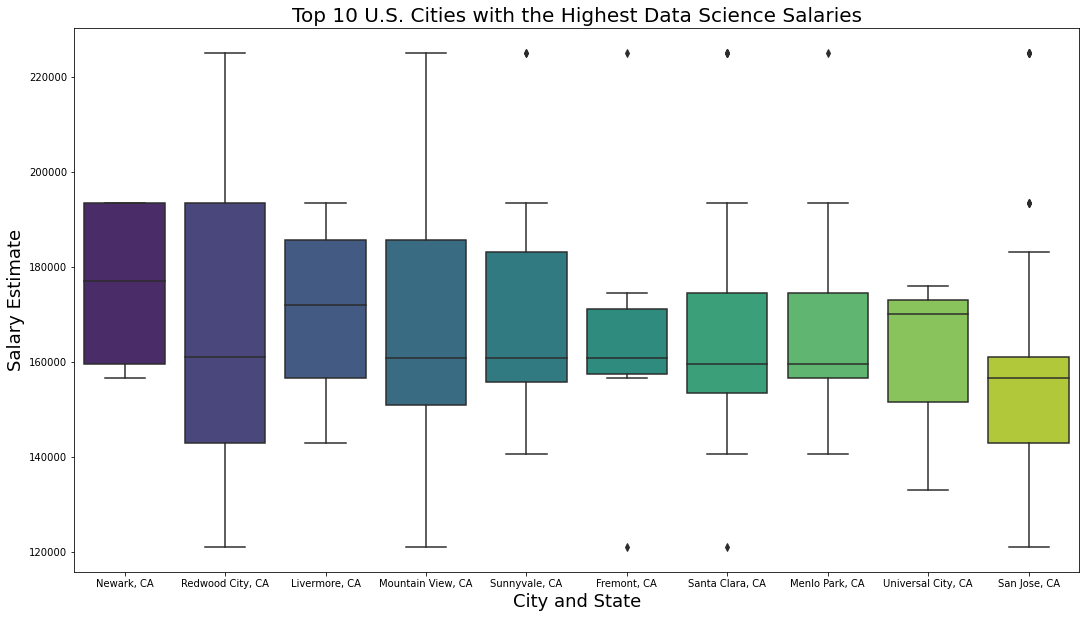

In [40]:
plt.figure(figsize = (18, 10))

grouped = filtered_salary_df.loc[:,['Location', 'Salary Estimate']] \
    .groupby(['Location']) \
    .mean() \
    .sort_values(by='Salary Estimate', ascending=False)[:10]

sns.boxplot(x=filtered_salary_df["Location"], y=salary_df["Salary Estimate"], order=grouped.index,  palette='viridis');

plt.title("Top 10 U.S. Cities with the Highest Data Science Salaries for non-Senior Roles", fontsize=20) 
plt.xlabel("City and State", fontsize=18)
plt.ylabel("Salary Estimate", fontsize=18)
plt.show()

The boxplot above gives a summary of data science salary by city. We can see that all of the cities with the highest salaries for data scientists are in California, and all but one of these cities are located in the San Francisco Bay Area. This is not surprising given we already saw that most data science jobs are in the IT sector and we would expect many IT jobs to be in Silicon Valley. This is a good indicator of where data scientists could focus their job search if they want to maximize salary. However, it would be important to also factor in cost of living, since California, and particularly the Bay Area, has a notoriously high cost of living. This would be a good avenue for further analysis.

### 4. Is there a  relationship between Glassdoor rating and salary?

In this section, we look at the relationship between Glassdoor rating and salary to get a sense of whether employee satisfaction is correllated with how much employees are paid. 

As a reminder, here is the explanation of Glassdoor ratings:
- 0.00 - 1.50 Employees are "Very Dissatisfied"
- 1.51 - 2.50 Employees are "Dissatisfied"
- 2.51 - 3.50 Employees say it's "OK"
- 3.51 - 4.00 Employees are "Satisfied"
- 4.01 - 5.00 Employees are "Very Satisfied"

In [24]:
# this is what our rating dataframe looks like
rating_df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Sector
0,Senior Data Scientist,146000,3.5,Hopper,"New York, NY",Travel & Tourism
1,"Data Scientist, Product Analytics",146000,4.5,Noom US,"New York, NY",Consumer Services
3,Data Analyst,146000,3.4,Sapphire Digital,"Lyndhurst, NJ",Information Technology
4,"Director, Data Science",146000,3.4,United Entertainment Group,"New York, NY",Business Services
5,Data Scientist,146000,2.9,IFG Companies,"New York, NY",Insurance


Since we want to know whether there is a relationship between the two quantitative variables Rating and Salary, a scatter plot is a good starting point to visualize the relationship.

salary: mean=108673.414 stdv=38457.468
rating: mean=3.785 stdv=0.615


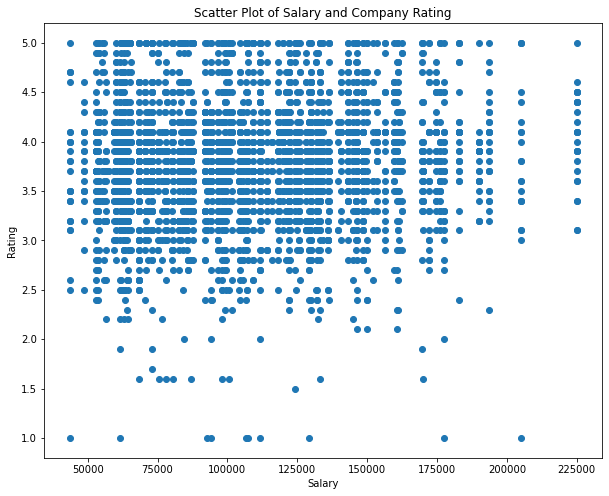

In [25]:
salary = rating_df["Salary Estimate"]
rating = rating_df["Rating"]

# print summary statistics 
print('salary: mean=%.3f stdv=%.3f' % (mean(salary), std(salary)))
print('rating: mean=%.3f stdv=%.3f' % (mean(rating), std(rating)))

plt.figure(figsize = (10, 8))

# show scatter plot
plt.scatter(salary, rating)
plt.xlabel("Salary")
plt.ylabel("Rating")
plt.title("Scatter Plot of Salary and Company Rating")
plt.show()

As we can see in the scatter plot above, there is not a clear relationship between the two variables. If we observed a monotonic relationship between the variables, it would make sense to calculate the correlation coefficient as a next step, in order to quantify the strength of the relationship between the two variables. Since the scatter plot does not show such a relationship, we can conclude that this dataset does not show a relationship between salary and Glassdoor company rating.